In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
gdf=gpd.read_file('Colleges_and_Universities (1).csv')

In [3]:
gdf.head()

,Colleges_and_Universities (1),field_2,field_3,field_4,field_5,field_6,field_7,field_8,field_9,field_10,...,field_248,field_249,field_250,field_251,field_252,field_253,field_254,field_255,field_256,geometry
0,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,...,,,,,,,,,,None
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,108199,Education,Colleges and Universities,,LA County,Abram Friedman Occupational Center,...,,,,,,,,,,None
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,377759,Education,Colleges and Universities,,LA County,Adelante Career Institute,...,,,,,,,,,,None
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,444343,Education,Colleges and Universities,,LA County,Advanced College,...,,,,,,,,,,None
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,108852,Education,Colleges and Universities,,LA County,American Academy Of Dramatic Arts-West,...,,,,,,,,,,None


In [4]:
#list(gdf)

In [5]:
columns_to_keep =['Colleges_and_Universities (1)',
 'field_2',
 'field_3',
 'field_4',
 'field_9',
 'field_10',
 'field_11',
 'field_12',
 'field_14',
 'field_15',
 'geometry']

In [6]:
gdf=gdf[columns_to_keep]

In [7]:
gdf.head()

,Colleges_and_Universities (1),field_2,field_3,field_4,field_9,field_10,field_11,field_12,field_14,field_15,geometry
0,X,Y,OBJECTID,source,org_name,Name,type,addrln1,city,state,None
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,None
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,None
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,LA County,Advanced College,For Profit,13180 Paramount Blvd.,South Gate,CA,None
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,None


In [8]:
gdf = gdf.drop([0])

In [9]:
gdf.columns

Index(['Colleges_and_Universities (1)', 'field_2', 'field_3', 'field_4',
       'field_9', 'field_10', 'field_11', 'field_12', 'field_14', 'field_15',
       'geometry'],
      dtype='object')

In [10]:
gdf.rename(columns={'Colleges_and_Universities (1)': 'X', 'field_2': 'Y','field_10':'Name','field_11':'SType', 'field_12': 'addrln1'}, inplace=True)

In [11]:
gdf.columns

Index(['X', 'Y', 'field_3', 'field_4', 'field_9', 'Name', 'SType', 'addrln1',
       'field_14', 'field_15', 'geometry'],
      dtype='object')

In [12]:
print(gdf['X'].head())

print(gdf['Y'].head())

1    -118.2661631
2    -118.4503272
3    -118.1582221
4    -118.0979014
5    -118.0986221
Name: X, dtype: object
1    34.03422497
2    34.22008342
3    33.91555197
4     34.1588594
5    33.87113085
Name: Y, dtype: object


In [13]:
utm18nCRS = gdf.crs
utm18nCRS

In [14]:
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.X, gdf.Y), crs=utm18nCRS)

In [15]:
gdf.crs

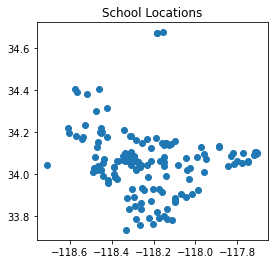

In [16]:
fig, ax = plt.subplots()
gdf.plot(ax=ax)
plt.title("School Locations")
plt.show()

In [17]:
gdf.geometry

1      POINT (-118.26616 34.03422)
2      POINT (-118.45033 34.22008)
3      POINT (-118.15822 33.91555)
4      POINT (-118.09790 34.15886)
5      POINT (-118.09862 33.87113)
                  ...             
156    POINT (-118.34069 34.20923)
157    POINT (-118.30914 34.07882)
158    POINT (-118.22022 33.79099)
159    POINT (-118.34663 34.08529)
160    POINT (-118.44295 33.99290)
Name: geometry, Length: 160, dtype: geometry

In [18]:
gdf = gpd.GeoDataFrame(gdf, 
                     crs='EPSG:4326',
                     geometry=gpd.points_from_xy(gdf.X, gdf.Y))

In [19]:
gdf = gdf[gdf.X!=0]

<AxesSubplot:>

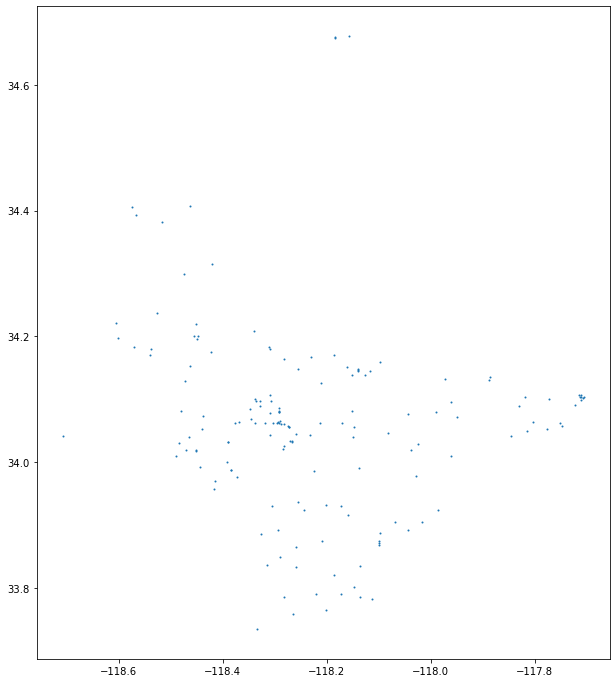

In [20]:
gdf.plot(figsize=(12,12),
             markersize=1)

In [21]:
gdf.sample(10)

,X,Y,field_3,field_4,field_9,Name,SType,addrln1,field_14,field_15,geometry
30,-118.1709231,34.06276897,2973,211,www.calstatela.edu,California State University Los Angeles,Public,5151 State University Dr.,Los Angeles,CA,POINT (-118.17092 34.06277)
154,-117.7477323,34.05809159,12145,HSIP Freedom CollegesUniversities,LA County,Western University Of Health Sciences,Private,309 E 2Nd St,Pomona,CA,POINT (-117.74773 34.05809)
7,-118.3093841,34.10712497,12034,HSIP Freedom CollegesUniversities,LA County,American Film Institute Conservatory,Private,2021 N Western Ave,Los Angeles,CA,POINT (-118.30938 34.10712)
20,-117.9604791,34.09649097,11985,HSIP Freedom CollegesUniversities,LA County,Baldwin Park Adult & Community Education,Public,4640 Maine Ave,Baldwin Park,CA,POINT (-117.96048 34.09649)
129,-117.9905923,34.08013674,12113,HSIP Freedom CollegesUniversities,LA County,Premiere Career College,For Profit,12901 Ramona Blvd,Irwindale,CA,POINT (-117.99059 34.08014)
139,-118.4512536,34.01855645,12152,HSIP Freedom CollegesUniversities,LA County,The Art Institute Of California-Los Angeles,For Profit,2900 31St St,Santa Monica,CA,POINT (-118.45125 34.01856)
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,LA County,Advanced College,For Profit,13180 Paramount Blvd.,South Gate,CA,POINT (-118.15822 33.91555)
79,-118.4547897,34.20085213,12130,HSIP Freedom CollegesUniversities,LA County,King'S College And Seminary,Private,14800 Sherman Way,Van Nuys,CA,POINT (-118.45479 34.20085)
35,-118.1564351,34.67751897,12012,HSIP Freedom CollegesUniversities,LA County,Career Care Institute,For Profit,43770 Fifteenth St W Ste 115,Lancaster,CA,POINT (-118.15644 34.67752)
106,-118.3370819,34.10059997,12099,HSIP Freedom CollegesUniversities,LA County,Musicians Institute,For Profit,1655 Mccadden,Hollywood,CA,POINT (-118.33708 34.10060)


In [22]:
gdf.rename(columns={'field_3': 'objectid', 'field_4': 'college','field_9':'county','field_14':'city','field_15':'state'}, inplace=True)

In [23]:
gdf.head()

,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-118.26616 34.03422)
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-118.45033 34.22008)
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,LA County,Advanced College,For Profit,13180 Paramount Blvd.,South Gate,CA,POINT (-118.15822 33.91555)
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,POINT (-118.09790 34.15886)
5,-118.0986221,33.87113085,12126,HSIP Freedom CollegesUniversities,LA County,American Auto Institute,For Profit,17522 Studebaker Rd,Cerritos,CA,POINT (-118.09862 33.87113)


In [24]:
gdf.tail()

,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry
156,-118.3406919,34.20922628,12131,HSIP Freedom CollegesUniversities,LA County,Woodbury University,Private,7500 Glenoaks Blvd,Burbank,CA,POINT (-118.34069 34.20923)
157,-118.3091365,34.07881815,12105,HSIP Freedom CollegesUniversities,LA County,World Mission University,Private,500 Shatto Pl Ste 600,Los Angeles,CA,POINT (-118.30914 34.07882)
158,-118.2202231,33.79099297,11979,HSIP Freedom CollegesUniversities,LA County,Wyotech-Long Beach,For Profit,2161 Technology Place,Long Beach,CA,POINT (-118.22022 33.79099)
159,-118.3466331,34.08529197,12090,HSIP Freedom CollegesUniversities,LA County,Yeshiva Ohr Elchonon Chabad West Coast Talmudi...,Private,7215 Waring Ave,Los Angeles,CA,POINT (-118.34663 34.08529)
160,-118.4429471,33.99289997,11980,HSIP Freedom CollegesUniversities,LA County,Yo San University Of Traditional Chinese Medicine,Private,13315 W. Washington Boulevard,Los Angeles,CA,POINT (-118.44295 33.99290)


In [25]:
SType_count = gdf.SType.value_counts().head(10).index.tolist()
SType_count

['For Profit', 'Private', 'Public']

In [26]:
type_count= gdf['SType'].value_counts()

In [27]:
type_count=type_count.reset_index()
type_count

,index,SType
0,For Profit,65
1,Private,61
2,Public,34


In [28]:
gdf[gdf.SType == 'Private'].head(10)

,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,POINT (-118.09790 34.15886)
7,-118.3093841,34.10712497,12034,HSIP Freedom CollegesUniversities,LA County,American Film Institute Conservatory,Private,2021 N Western Ave,Los Angeles,CA,POINT (-118.30938 34.10712)
9,-118.4717091,34.12925797,12049,HSIP Freedom CollegesUniversities,LA County,American Jewish University,Private,15600 Mulholland Dr,Los Angeles,CA,POINT (-118.47171 34.12926)
14,-118.3846511,33.98763997,11963,HSIP Freedom CollegesUniversities,LA County,Antioch University-Los Angeles Branch,Private,400 Corporate Pointe,Culver City,CA,POINT (-118.38465 33.98764)
16,-118.1869011,34.17084397,12035,HSIP Freedom CollegesUniversities,LA County,Art Center College Of Design,Private,1700 Lida St,Pasadena,CA,POINT (-118.18690 34.17084)
19,-117.8879501,34.1308651,12153,HSIP Freedom CollegesUniversities,LA County,Azusa Pacific University,Private,901 E Alosta,Azusa,CA,POINT (-117.88795 34.13087)
21,-118.0173424,33.90482309,12135,HSIP Freedom CollegesUniversities,LA County,Biola University,Private,13800 Biola Ave,La Mirada,CA,POINT (-118.01734 33.90482)
26,-118.1257399,34.1392753,12148,HSIP Freedom CollegesUniversities,LA County,California Institute Of Technology,Private,1200 E California Blvd,Pasadena,CA,POINT (-118.12574 34.13928)
27,-118.5673032,34.39333701,12127,HSIP Freedom CollegesUniversities,LA County,California Institute Of The Arts,Private,24700 W Mcbean Pky,Valencia,CA,POINT (-118.56730 34.39334)
37,-118.4487061,34.19534297,12039,HSIP Freedom CollegesUniversities,LA County,Casa Loma College-Van Nuys,Private,6850 Van Nuys Blvd Ste 300,Van Nuys,CA,POINT (-118.44871 34.19534)


In [29]:
gdf = gdf.to_crs(epsg=4326)

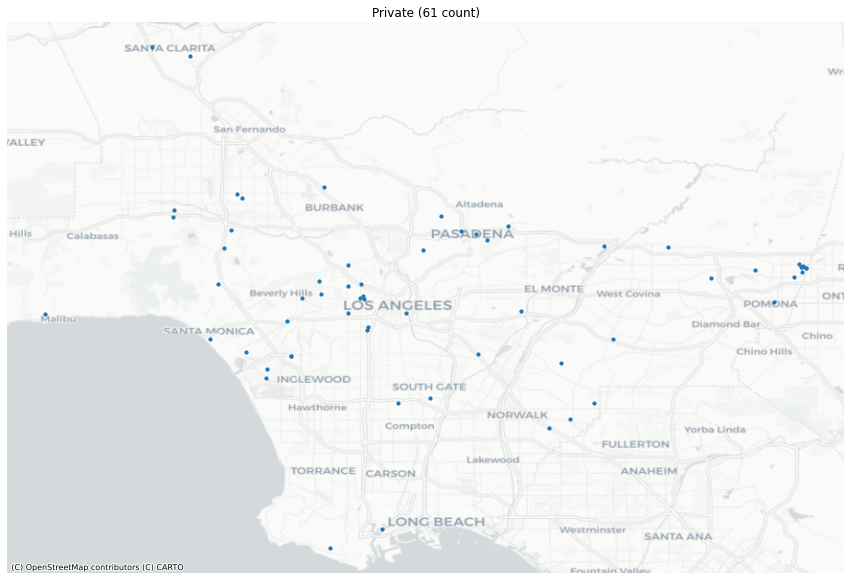

In [30]:
SType = 'Private'

# map
ax = gdf[gdf.SType == SType].plot(figsize=(15,15), markersize=10)

# title (including count)
ax.set_title(SType + ' (' + str(gdf[gdf.SType == SType].shape[0]) + ' count)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', # surprise! You can change the crs here!
                source=ctx.providers.CartoDB.Positron)

In [31]:
def SType_by(SType='Public'):
    
    # map
    ax = gdf[gdf.SType == SType].plot(figsize=(9,9), markersize=10)
    
    # axis
    ax.axis('off')
    
    # title (including count)
    ax.set_title(SType + ' (' + str(gdf[gdf.SType == SType].shape[0]) + ' count)')

    # basemap
    ctx.add_basemap(ax,
                    crs='epsg:4326', # surprise! You can change the crs here!
                    source=ctx.providers.CartoDB.Positron)

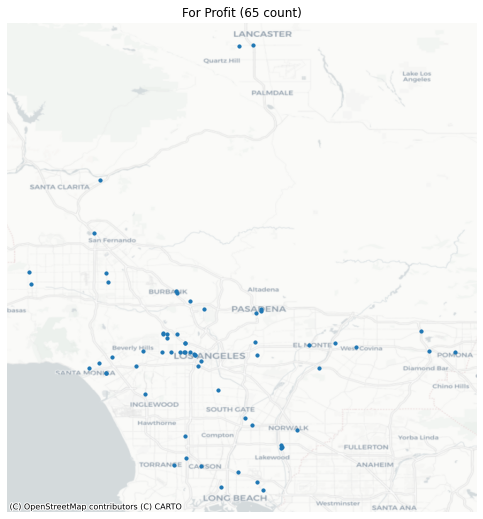

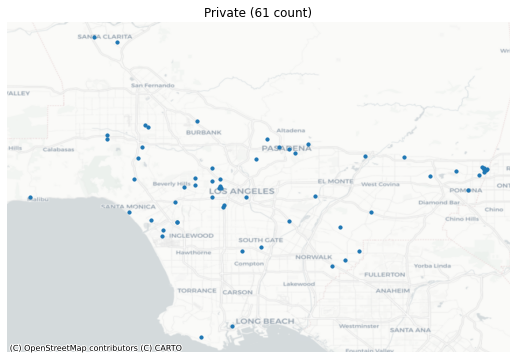

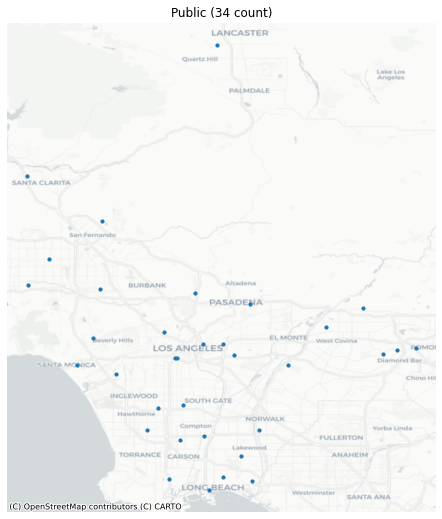

In [32]:
for SType in SType_count:
    SType_by(SType = SType)

In [33]:
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

In [34]:
gdf.head()

,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry,x,y
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-118.26616 34.03422),-118.266163,34.034225
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-118.45033 34.22008),-118.450327,34.220083
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,LA County,Advanced College,For Profit,13180 Paramount Blvd.,South Gate,CA,POINT (-118.15822 33.91555),-118.158222,33.915552
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,POINT (-118.09790 34.15886),-118.097901,34.158859
5,-118.0986221,33.87113085,12126,HSIP Freedom CollegesUniversities,LA County,American Auto Institute,For Profit,17522 Studebaker Rd,Cerritos,CA,POINT (-118.09862 33.87113),-118.098622,33.871131


In [35]:
gdf = gdf.to_crs(epsg=3857)

In [36]:
gdf_buffer = gdf.copy()

In [37]:
gdf_buffer = gdf_buffer.to_crs(epsg=3857)

In [38]:
gdf_buffer['geometry']=gdf_buffer['geometry'].buffer(3218)

In [39]:
gdf_buffer.head()

,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry,x,y
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,"POLYGON ((-13182612.108 4058392.275, -13182627...",-118.450327,34.220083
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,LA County,Advanced College,For Profit,13180 Paramount Blvd.,South Gate,CA,"POLYGON ((-13150095.117 4017468.348, -13150110...",-118.158222,33.915552
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,"POLYGON ((-13143380.248 4050152.961, -13143395...",-118.097901,34.158859
5,-118.0986221,33.87113085,12126,HSIP Freedom CollegesUniversities,LA County,American Auto Institute,For Profit,17522 Studebaker Rd,Cerritos,CA,"POLYGON ((-13143460.476 4011511.146, -13143475...",-118.098622,33.871131


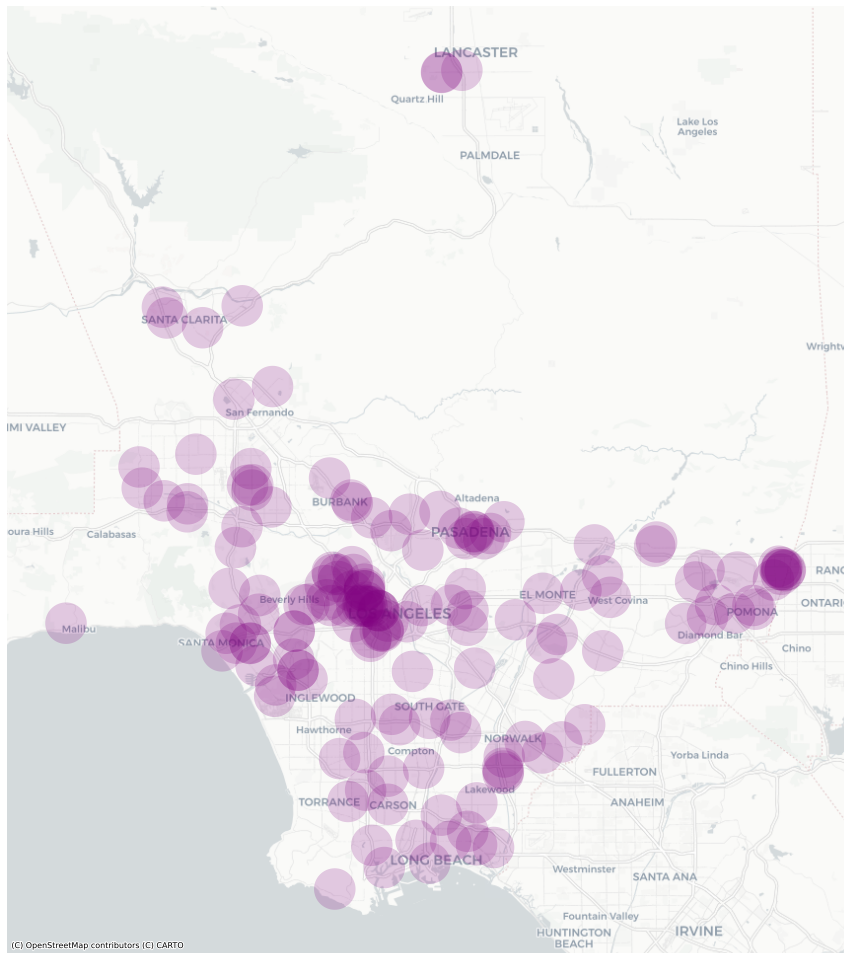

In [40]:
fig,ax = plt.subplots(figsize=(15,20))

gdf_buffer.plot(ax=ax,
             color='purple',
             markersize=.5, alpha=.2,)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [41]:
grs = gpd.read_file("GroceryStores-Copy1.geojson")

In [42]:
desired_columns=['Store_Name','Store_Chain','Latitude','Longitude','geometry']

grs_trimmed= grs[desired_columns]

In [43]:
grs_trimmed.head()

,Store_Name,Store_Chain,Latitude,Longitude,geometry
0,99 Ranch Market 38,99 Ranch Market,34.09719,-118.1227,POINT (-13149358.815 4041859.746)
1,99 RANCH MARKET 17,99 Ranch Market,33.87005,-118.0824,POINT (-13144872.640 4011366.235)
2,99 Ranch Market 18,99 Ranch Market,33.99284,-117.9318,POINT (-13128107.924 4027840.654)
3,99 RANCH MARKET 7,99 Ranch Market,34.12338,-118.0597,POINT (-13142345.687 4045381.002)
4,99 Ranch Market 3,99 Ranch Market,33.99646,-117.8884,POINT (-13123276.658 4028326.701)


In [44]:
stores_freq1 = pd.read_csv('store_freq.csv',index_col=0)
stores_freq1.head()

,index,Store_Chain
0,Ralphs,145
1,Vons,111
2,Smart&final,99
3,Albertsons,97
4,Target,76


In [45]:
stores_county = stores_freq1.drop(index=[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46])
print(stores_county)

               index  Store_Chain
0             Ralphs          145
1               Vons          111
2        Smart&final           99
3         Albertsons           97
4             Target           76
5   Mother_Nutrition           65
6        Trader_joes           60
7        Food_4_Less           54
8            Walmart           49
9         Fresh&Easy           47
10       Sav_on_drug           44
11  Superior_grocers           33
12       Whole_Foods           33
13        Numero_uno           30
14       Stater_bros           29
15          El_Super           28
16           Sprouts           27
17          Vallarta           27
18              Aldi           27
19  Costco_Wholesale           26
20         Northgate           20


In [46]:
store_freq = grs_trimmed.Store_Chain.value_counts().reset_index()
store_freq.to_csv('store_freq.csv')

In [47]:
stores_county = stores_freq1.drop(index=[21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46])
print(stores_county)

               index  Store_Chain
0             Ralphs          145
1               Vons          111
2        Smart&final           99
3         Albertsons           97
4             Target           76
5   Mother_Nutrition           65
6        Trader_joes           60
7        Food_4_Less           54
8            Walmart           49
9         Fresh&Easy           47
10       Sav_on_drug           44
11  Superior_grocers           33
12       Whole_Foods           33
13        Numero_uno           30
14       Stater_bros           29
15          El_Super           28
16           Sprouts           27
17          Vallarta           27
18              Aldi           27
19  Costco_Wholesale           26
20         Northgate           20


In [48]:
stores_county.columns = ['Store_chain', 'number']
stores_county

,Store_chain,number
0,Ralphs,145
1,Vons,111
2,Smart&final,99
3,Albertsons,97
4,Target,76
5,Mother_Nutrition,65
6,Trader_joes,60
7,Food_4_Less,54
8,Walmart,49
9,Fresh&Easy,47


In [49]:
grs_s = grs_trimmed.to_crs(epsg=3857)

In [50]:
minx, miny, maxx, maxy = gdf_buffer.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13217696.145760443
-13099747.192824122
3990006.7632707655
4123361.159083633


In [51]:
gdf_buffer = gdf_buffer.to_crs(epsg=3857)

In [52]:
join = gpd.sjoin( gdf_buffer, grs_s, how='left')
join.head(20)

,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry,x,y,index_right,Store_Name,Store_Chain,Latitude,Longitude
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,546.0,Numero Uno Market 101,Numero_uno,34.01506,-118.2645
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,496.0,Mother's Nutritional Center 0214,Mother_Nutrition,34.01963,-118.2626
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,320.0,Fresh & Easy 1463,Fresh&Easy,34.0221,-118.2799
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,564.0,Numero Uno Market 105,Numero_uno,34.02443,-118.2595
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,1129.0,Trader Joe's 250,Trader_joes,34.02661,-118.284
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,994.0,Superior Grocers 124,Superior_grocers,34.02662,-118.284
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,469.0,Mother's Nutritional Center 0232,Mother_Nutrition,34.0293,-118.2612
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,656.0,RALPHS GROCERY CO. 294,Ralphs,34.03232,-118.2915
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,779.0,SAV ON DRUG 9464,Sav_on_drug,34.03808,-118.2715
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,517.0,Mother's Nutritional Center 608,Mother_Nutrition,34.04007,-118.2929


In [53]:
## Now they will split off into their own data frames

In [54]:
gdf_private= join[join.SType == 'Private'].reset_index()
gdf_private

,index,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry,x,y,index_right,Store_Name,Store_Chain,Latitude,Longitude
0,4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,"POLYGON ((-13143380.248 4050152.961, -13143395...",-118.097901,34.158859,837.0,SMART & FINAL #305,Smart&final,34.15062,-118.1216
1,4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,"POLYGON ((-13143380.248 4050152.961, -13143395...",-118.097901,34.158859,1229.0,VONS 2139,Vons,34.17035,-118.113
2,4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,"POLYGON ((-13143380.248 4050152.961, -13143395...",-118.097901,34.158859,942.0,Stater Bros Market 202,Stater_bros,34.17035,-118.113
3,4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,"POLYGON ((-13143380.248 4050152.961, -13143395...",-118.097901,34.158859,1197.0,VONS 2858,Vons,34.14614,-118.1018
4,4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,"POLYGON ((-13143380.248 4050152.961, -13143395...",-118.097901,34.158859,1020.0,Target Store T-1332,Target,34.14624,-118.0868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,160,-118.4429471,33.99289997,11980,HSIP Freedom CollegesUniversities,LA County,Yo San University Of Traditional Chinese Medicine,Private,13315 W. Washington Boulevard,Los Angeles,CA,"POLYGON ((-13181790.559 4027848.705, -13181806...",-118.442947,33.992900,626.0,RALPHS 281,Ralphs,33.99855,-118.4619
650,160,-118.4429471,33.99289997,11980,HSIP Freedom CollegesUniversities,LA County,Yo San University Of Traditional Chinese Medicine,Private,13315 W. Washington Boulevard,Los Angeles,CA,"POLYGON ((-13181790.559 4027848.705, -13181806...",-118.442947,33.992900,835.0,SMART & FINAL 332,Smart&final,34,-118.465
651,160,-118.4429471,33.99289997,11980,HSIP Freedom CollegesUniversities,LA County,Yo San University Of Traditional Chinese Medicine,Private,13315 W. Washington Boulevard,Los Angeles,CA,"POLYGON ((-13181790.559 4027848.705, -13181806...",-118.442947,33.992900,1351.0,Whole Foods Market 10333,Whole_Foods,34.00156,-118.4684
652,160,-118.4429471,33.99289997,11980,HSIP Freedom CollegesUniversities,LA County,Yo San University Of Traditional Chinese Medicine,Private,13315 W. Washington Boulevard,Los Angeles,CA,"POLYGON ((-13181790.559 4027848.705, -13181806...",-118.442947,33.992900,760.0,SAV ON DRUG 9401,Sav_on_drug,34.00161,-118.4685


In [55]:
gdf_public= join[join.SType == 'Public'].reset_index()
gdf_public

,index,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry,x,y,index_right,Store_Name,Store_Chain,Latitude,Longitude
0,1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,546.0,Numero Uno Market 101,Numero_uno,34.01506,-118.2645
1,1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,496.0,Mother's Nutritional Center 0214,Mother_Nutrition,34.01963,-118.2626
2,1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,320.0,Fresh & Easy 1463,Fresh&Easy,34.0221,-118.2799
3,1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,564.0,Numero Uno Market 105,Numero_uno,34.02443,-118.2595
4,1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,1129.0,Trader Joe's 250,Trader_joes,34.02661,-118.284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,153,-118.3907381,34.00043197,12088,HSIP Freedom CollegesUniversities,LA County,West Los Angeles College,Public,9000 Overland Avenue,Culver City,CA,"POLYGON ((-13175978.680 4028860.029, -13175994...",-118.390738,34.000432,1219.0,VONS 2212,Vons,33.99703,-118.3953
354,153,-118.3907381,34.00043197,12088,HSIP Freedom CollegesUniversities,LA County,West Los Angeles College,Public,9000 Overland Avenue,Culver City,CA,"POLYGON ((-13175978.680 4028860.029, -13175994...",-118.390738,34.000432,1031.0,Target Store T-0198,Target,34.00084,-118.395
355,153,-118.3907381,34.00043197,12088,HSIP Freedom CollegesUniversities,LA County,West Los Angeles College,Public,9000 Overland Avenue,Culver City,CA,"POLYGON ((-13175978.680 4028860.029, -13175994...",-118.390738,34.000432,619.0,RALPHS 284,Ralphs,34.00252,-118.3941
356,153,-118.3907381,34.00043197,12088,HSIP Freedom CollegesUniversities,LA County,West Los Angeles College,Public,9000 Overland Avenue,Culver City,CA,"POLYGON ((-13175978.680 4028860.029, -13175994...",-118.390738,34.000432,599.0,RALPHS GROCERY COMPANY 86,Ralphs,34.01735,-118.4075


In [56]:
gdf_profit= join[join.SType == 'For Profit'].reset_index()
gdf_profit

,index,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry,x,y,index_right,Store_Name,Store_Chain,Latitude,Longitude
0,2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,"POLYGON ((-13182612.108 4058392.275, -13182627...",-118.450327,34.220083,509.0,Mother's Nutritional Center 604,Mother_Nutrition,34.20015,-118.4487
1,2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,"POLYGON ((-13182612.108 4058392.275, -13182627...",-118.450327,34.220083,970.0,Super King Market 6,Super_king,34.2024,-118.4488
2,2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,"POLYGON ((-13182612.108 4058392.275, -13182627...",-118.450327,34.220083,89.0,ALBERTSONS 6389,Albertsons,34.2024,-118.4488
3,2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,"POLYGON ((-13182612.108 4058392.275, -13182627...",-118.450327,34.220083,876.0,SMART & FINAL 349,Smart&final,34.21218,-118.4492
4,2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,"POLYGON ((-13182612.108 4058392.275, -13182627...",-118.450327,34.220083,1043.0,Target Store T-1309,Target,34.21328,-118.4595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,152,-118.2923833,34.07930692,12003,HSIP Freedom CollegesUniversities,LA County,West Coast University,For Profit,4021 Rosewood Ave,Los Angeles,CA,"POLYGON ((-13165029.874 4039455.985, -13165045...",-118.292383,34.079307,429.0,JONS MARKET 11,Jons,34.10021,-118.2918
957,152,-118.2923833,34.07930692,12003,HSIP Freedom CollegesUniversities,LA County,West Coast University,For Profit,4021 Rosewood Ave,Los Angeles,CA,"POLYGON ((-13165029.874 4039455.985, -13165045...",-118.292383,34.079307,1074.0,Target Store T2479,Target,34.09793,-118.3096
958,152,-118.2923833,34.07930692,12003,HSIP Freedom CollegesUniversities,LA County,West Coast University,For Profit,4021 Rosewood Ave,Los Angeles,CA,"POLYGON ((-13165029.874 4039455.985, -13165045...",-118.292383,34.079307,286.0,FOOD 4 LESS 362,Food_4_Less,34.09807,-118.309
959,158,-118.2202231,33.79099297,11979,HSIP Freedom CollegesUniversities,LA County,Wyotech-Long Beach,For Profit,2161 Technology Place,Long Beach,CA,"POLYGON ((-13156997.037 4000771.897, -13157012...",-118.220223,33.790993,531.0,NORTHGATE #12,Northgate,33.79579,-118.1936


In [57]:
stores_in_private = gdf_private.Name.value_counts().rename_axis('Name').reset_index(name='store_count')
stores_in_private.head(20)

,Name,store_count
0,Ces College,25
1,Southwestern Law School,25
2,Yeshiva Ohr Elchonon Chabad West Coast Talmudi...,24
3,Dongguk Royal University,24
4,University Of Southern California,21
5,Los Angeles Ort Technical Institute,20
6,Hebrew Union College-Jewish Institute Of Religion,19
7,King'S College And Seminary,19
8,Pacific States University,18
9,World Mission University,18


In [58]:
stores_in_public = gdf_public.Name.value_counts().rename_axis('Name').reset_index(name='store_count')
stores_in_public.head(20)

,Name,store_count
0,Abram Friedman Occupational Center,25
1,Los Angeles Trade Technical College,25
2,Long Beach City College - Pacific Coast Campus,23
3,Santa Monica Community College District,22
4,El Camino Community College District,19
5,Los Angeles City College,16
6,Cerritos Community College District,14
7,East Los Angeles College,14
8,Los Angeles Valley College,13
9,Citrus College,11


In [59]:
stores_in_profit = gdf_profit.Name.value_counts().rename_axis('Name').reset_index(name='store_count')
stores_in_profit.head(20)

,Name,store_count
0,Liberty Training Institute,29
1,Intercoast Colleges,27
2,Marian Health Careers Center,27
3,La College International,26
4,Diversified Language Institute,25
5,Walter Jay Md Institute An Educational Center,25
6,Associated Technical College,25
7,Bryan College,24
8,Virginia Sewing Machines And School Center,22
9,California Career College,21


In [60]:
private_merge=gdf_buffer.merge(stores_in_private,on='Name')
private_merge.head(10)

,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry,x,y,store_count
0,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,"POLYGON ((-13143380.248 4050152.961, -13143395...",-118.097901,34.158859,10
1,-118.3093841,34.10712497,12034,HSIP Freedom CollegesUniversities,LA County,American Film Institute Conservatory,Private,2021 N Western Ave,Los Angeles,CA,"POLYGON ((-13166922.394 4043195.378, -13166937...",-118.309384,34.107125,11
2,-118.4717091,34.12925797,12049,HSIP Freedom CollegesUniversities,LA County,American Jewish University,Private,15600 Mulholland Dr,Los Angeles,CA,"POLYGON ((-13184992.330 4046171.447, -13185007...",-118.471709,34.129258,1
3,-118.3846511,33.98763997,11963,HSIP Freedom CollegesUniversities,LA County,Antioch University-Los Angeles Branch,Private,400 Corporate Pointe,Culver City,CA,"POLYGON ((-13175301.078 4027142.497, -13175316...",-118.384651,33.987640,10
4,-118.1869011,34.17084397,12035,HSIP Freedom CollegesUniversities,LA County,Art Center College Of Design,Private,1700 Lida St,Pasadena,CA,"POLYGON ((-13153287.649 4051765.331, -13153303...",-118.186901,34.170844,1
5,-117.8879501,34.1308651,12153,HSIP Freedom CollegesUniversities,LA County,Azusa Pacific University,Private,901 E Alosta,Azusa,CA,"POLYGON ((-13120008.576 4046387.577, -13120024...",-117.887950,34.130865,13
6,-118.0173424,33.90482309,12135,HSIP Freedom CollegesUniversities,LA County,Biola University,Private,13800 Biola Ave,La Mirada,CA,"POLYGON ((-13134412.461 4016029.241, -13134427...",-118.017342,33.904823,11
7,-118.1257399,34.1392753,12148,HSIP Freedom CollegesUniversities,LA County,California Institute Of Technology,Private,1200 E California Blvd,Pasadena,CA,"POLYGON ((-13146479.215 4047518.663, -13146494...",-118.125740,34.139275,12
8,-118.5673032,34.39333701,12127,HSIP Freedom CollegesUniversities,LA County,California Institute Of The Arts,Private,24700 W Mcbean Pky,Valencia,CA,"POLYGON ((-13195633.817 4081740.654, -13195649...",-118.567303,34.393337,8
9,-118.4487061,34.19534297,12039,HSIP Freedom CollegesUniversities,LA County,Casa Loma College-Van Nuys,Private,6850 Van Nuys Blvd Ste 300,Van Nuys,CA,"POLYGON ((-13182431.648 4055062.071, -13182447...",-118.448706,34.195343,17


In [61]:
public_merge=gdf_buffer.merge(stores_in_public,on='Name')
public_merge.head(10)

,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry,x,y,store_count
0,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,"POLYGON ((-13162111.054 4033398.530, -13162126...",-118.266163,34.034225,25
1,-118.1843711,34.67498697,58290,211,www.avc.edu,Antelope Valley Community College District,Public,3041 W. Ave. K,Lancaster,CA,"POLYGON ((-13153006.011 4119800.421, -13153021...",-118.184371,34.674987,10
2,-117.9604791,34.09649097,11985,HSIP Freedom CollegesUniversities,LA County,Baldwin Park Adult & Community Education,Public,4640 Maine Ave,Baldwin Park,CA,"POLYGON ((-13128082.467 4041765.776, -13128097...",-117.960479,34.096491,7
3,-117.8144661,34.04953097,2878,211,www.csupomona.edu,California State Polytechnic University - Pomona,Public,3801 W. Temple Ave.,Pomona,CA,"POLYGON ((-13111828.374 4035454.766, -13111843...",-117.814466,34.049531,1
4,-118.1709231,34.06276897,2973,211,www.calstatela.edu,California State University Los Angeles,Public,5151 State University Dr.,Los Angeles,CA,"POLYGON ((-13151508.986 4037233.482, -13151524...",-118.170923,34.062769,2
5,-118.2593166,33.86523983,12134,HSIP Freedom CollegesUniversities,LA County,California State University-Dominguez Hills,Public,1000 E Victoria St,Carson,CA,"POLYGON ((-13161348.905 4010721.349, -13161364...",-118.259317,33.865240,4
6,-118.1122997,33.78275204,12122,HSIP Freedom CollegesUniversities,LA County,California State University-Long Beach,Public,1250 Bellflower Blvd,Long Beach,CA,"POLYGON ((-13144983.059 3999668.103, -13144998...",-118.112300,33.782752,7
7,-118.5268173,34.23670963,12091,HSIP Freedom CollegesUniversities,LA County,California State University-Northridge,Public,18111 Nordhoff St,Northridge,CA,"POLYGON ((-13191126.947 4060630.805, -13191142...",-118.526817,34.236710,10
8,-118.2012571,33.76461597,2895,211,www.calstate.edu/executive/,"California State University, The - Office Of T...",Public,401 Golden Shore,Long Beach,CA,"POLYGON ((-13154885.751 3997239.324, -13154901...",-118.201257,33.764616,10
9,-118.0974731,33.88742597,57316,211,www.cerritos.edu,Cerritos Community College District,Public,11110 Alondra Blvd.,Norwalk,CA,"POLYGON ((-13143332.569 4013696.082, -13143348...",-118.097473,33.887426,14


In [62]:
profit_merge=gdf_buffer.merge(stores_in_profit,on='Name')
profit_merge.head(10)

,X,Y,objectid,college,county,Name,SType,addrln1,city,state,geometry,x,y,store_count
0,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,"POLYGON ((-13182612.108 4058392.275, -13182627...",-118.450327,34.220083,20
1,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,LA County,Advanced College,For Profit,13180 Paramount Blvd.,South Gate,CA,"POLYGON ((-13150095.117 4017468.348, -13150110...",-118.158222,33.915552,7
2,-118.0986221,33.87113085,12126,HSIP Freedom CollegesUniversities,LA County,American Auto Institute,For Profit,17522 Studebaker Rd,Cerritos,CA,"POLYGON ((-13143460.476 4011511.146, -13143475...",-118.098622,33.871131,14
3,-118.2922819,34.07923633,12104,HSIP Freedom CollegesUniversities,LA County,American Career College,For Profit,4021 Rosewood Avenue,Los Angeles,CA,"POLYGON ((-13165018.586 4039446.498, -13165034...",-118.292282,34.079236,19
4,-118.4394365,34.05226361,12095,HSIP Freedom CollegesUniversities,LA County,American Intercontinental University,For Profit,12655 West Jefferson Blvd,Los Angeles,CA,"POLYGON ((-13181399.761 4035821.913, -13181415...",-118.439436,34.052264,15
5,-118.4476485,34.20142106,12110,HSIP Freedom CollegesUniversities,LA County,American Pacific College,For Profit,"14435 Sherman Way, Suite 208",Van Nuys,CA,"POLYGON ((-13182313.917 4055880.126, -13182329...",-118.447648,34.201421,20
6,-118.1850431,33.82011297,11989,HSIP Freedom CollegesUniversities,LA County,American University Of Health Sciences,For Profit,3501 Atlantic Ave.,Long Beach,CA,"POLYGON ((-13153080.817 4004673.093, -13153096...",-118.185043,33.820113,13
7,-118.1848359,34.67540588,12132,HSIP Freedom CollegesUniversities,LA County,Antelope Valley Medical College,For Profit,44201 10Th St West,Lancaster,CA,"POLYGON ((-13153057.752 4119857.125, -13153073...",-118.184836,34.675406,10
8,-118.4511201,34.01893997,12016,HSIP Freedom CollegesUniversities,LA County,Argosy University-Los Angeles,For Profit,2950 31St Street,Santa Monica,CA,"POLYGON ((-13182700.373 4031345.485, -13182715...",-118.451120,34.018940,21
9,-118.2721546,34.05628179,12103,HSIP Freedom CollegesUniversities,LA County,Associated Technical College,For Profit,1670 Wilshire Blvd,Los Angeles,CA,"POLYGON ((-13162778.025 4036361.801, -13162793...",-118.272155,34.056282,25


In [63]:
private_buffer = private_merge.to_crs(epsg=3857)

In [64]:
private_dissolved= private_buffer.dissolve()

In [65]:
public_buffer = public_merge.to_crs(epsg=3857)

In [66]:
public_dissolved= public_buffer.dissolve()

In [67]:
profit_buffer = profit_merge.to_crs(epsg=3857)

In [68]:
profit_dissolved= profit_buffer.dissolve()

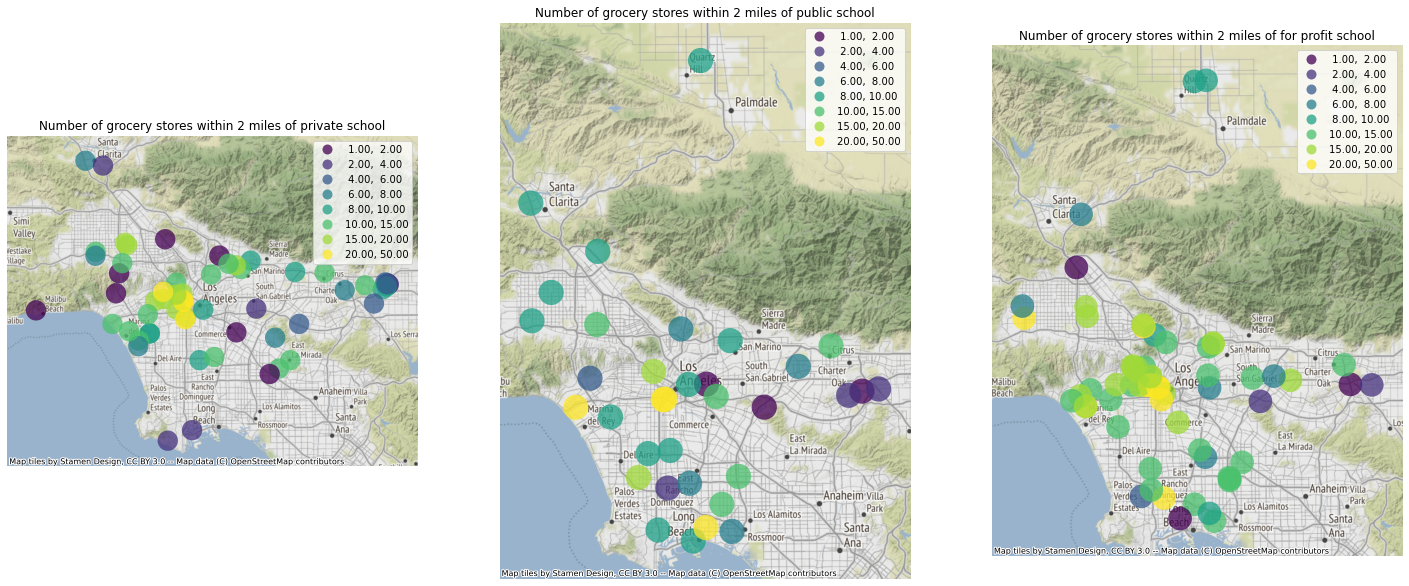

In [69]:
fig, axs = plt.subplots(1, 3, figsize=(25, 25))

ax1, ax2, ax3 = axs

private_buffer.plot(column='store_count',
                    cmap='viridis', 
                    scheme='user_defined',
                    classification_kwds={'bins':[2,4,6,8,10,15,20,50]}, 
                    edgecolor='white', 
                    linewidth=0., 
                    alpha=0.75, 
                    ax=ax1,
                    legend=True,
                    markersize=0.05
                    )


ax1.axis('off')
ax1.set_title('Number of grocery stores within 2 miles of private school')
ctx.add_basemap(ax1)

public_buffer.plot(column='store_count',
                   cmap='viridis', 
                   scheme='user_defined',
                   classification_kwds={'bins':[2,4,6,8,10,15,20,50]}, 
                   edgecolor='white', 
                   linewidth=0., 
                   alpha=0.75, 
                   ax=ax2,
                   legend=True,
                   markersize=0.05
                   )

ax2.axis("off")
ax2.set_title('Number of grocery stores within 2 miles of public school' )
ctx.add_basemap(ax2)


profit_buffer.plot(column='store_count',
                   cmap='viridis', 
                   scheme='user_defined',
                   classification_kwds={'bins':[2,4,6,8,10,15,20,50]}, 
                   edgecolor='white', 
                   linewidth=0., 
                   alpha=0.75, 
                   ax=ax3,
                   legend=True,
                   markersize=0.05
                   )

ax3.axis("off")
ax3.set_title('Number of grocery stores within 2 miles of for profit school')
ctx.add_basemap(ax3)

In [70]:
store_by_private=gdf_private.groupby(['Name','Store_Chain','addrln1'])['objectid'].agg('count').reset_index()
store_by_private.head(50)

,Name,Store_Chain,addrln1,objectid
0,American Academy Of Dramatic Arts-West,Ralphs,1336 N La Brea,1
1,American Academy Of Dramatic Arts-West,Smart&final,1336 N La Brea,2
2,American Academy Of Dramatic Arts-West,Sprouts,1336 N La Brea,1
3,American Academy Of Dramatic Arts-West,Stater_bros,1336 N La Brea,1
4,American Academy Of Dramatic Arts-West,Target,1336 N La Brea,1
5,American Academy Of Dramatic Arts-West,Trader_joes,1336 N La Brea,1
6,American Academy Of Dramatic Arts-West,Vons,1336 N La Brea,2
7,American Academy Of Dramatic Arts-West,Whole_Foods,1336 N La Brea,1
8,American Film Institute Conservatory,Albertsons,2021 N Western Ave,1
9,American Film Institute Conservatory,Food_4_Less,2021 N Western Ave,1


In [71]:
private_store_merge=gdf.merge(store_by_private,on='addrln1')
private_store_merge.head(20)

,X,Y,objectid_x,college,county,Name_x,SType,addrln1,city,state,geometry,x,y,Name_y,Store_Chain,objectid_y
0,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,POINT (-13146598.248 4050152.961),-118.097901,34.158859,American Academy Of Dramatic Arts-West,Ralphs,1
1,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,POINT (-13146598.248 4050152.961),-118.097901,34.158859,American Academy Of Dramatic Arts-West,Smart&final,2
2,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,POINT (-13146598.248 4050152.961),-118.097901,34.158859,American Academy Of Dramatic Arts-West,Sprouts,1
3,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,POINT (-13146598.248 4050152.961),-118.097901,34.158859,American Academy Of Dramatic Arts-West,Stater_bros,1
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,POINT (-13146598.248 4050152.961),-118.097901,34.158859,American Academy Of Dramatic Arts-West,Target,1
5,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,POINT (-13146598.248 4050152.961),-118.097901,34.158859,American Academy Of Dramatic Arts-West,Trader_joes,1
6,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,POINT (-13146598.248 4050152.961),-118.097901,34.158859,American Academy Of Dramatic Arts-West,Vons,2
7,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,POINT (-13146598.248 4050152.961),-118.097901,34.158859,American Academy Of Dramatic Arts-West,Whole_Foods,1
8,-118.3093841,34.10712497,12034,HSIP Freedom CollegesUniversities,LA County,American Film Institute Conservatory,Private,2021 N Western Ave,Los Angeles,CA,POINT (-13170140.394 4043195.378),-118.309384,34.107125,American Film Institute Conservatory,Albertsons,1
9,-118.3093841,34.10712497,12034,HSIP Freedom CollegesUniversities,LA County,American Film Institute Conservatory,Private,2021 N Western Ave,Los Angeles,CA,POINT (-13170140.394 4043195.378),-118.309384,34.107125,American Film Institute Conservatory,Food_4_Less,1


In [72]:
columns_to_keep= ['objectid_x',
                  'Name_x',
                  'SType',
                  'addrln1',
                  'city',
                  'x',
                  'y',
                  'geometry',
                  'Store_Chain',
                  'objectid_y']

In [73]:
private_store_merge=private_store_merge[columns_to_keep]
private_store_merge.head()

,objectid_x,Name_x,SType,addrln1,city,x,y,geometry,Store_Chain,objectid_y
0,12114,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,-118.097901,34.158859,POINT (-13146598.248 4050152.961),Ralphs,1
1,12114,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,-118.097901,34.158859,POINT (-13146598.248 4050152.961),Smart&final,2
2,12114,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,-118.097901,34.158859,POINT (-13146598.248 4050152.961),Sprouts,1
3,12114,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,-118.097901,34.158859,POINT (-13146598.248 4050152.961),Stater_bros,1
4,12114,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,-118.097901,34.158859,POINT (-13146598.248 4050152.961),Target,1


In [74]:
private_store_merge.columns = ['OBJECTID',
                       'School_name',
                       'Type',
                       'school_location',
                       'City',
                       'Latitude',
                       'Longitude',
                       'geometry',
                       'Store_Chain',
                       'store_count']

private_store_merge.head()

,OBJECTID,School_name,Type,school_location,City,Latitude,Longitude,geometry,Store_Chain,store_count
0,12114,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,-118.097901,34.158859,POINT (-13146598.248 4050152.961),Ralphs,1
1,12114,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,-118.097901,34.158859,POINT (-13146598.248 4050152.961),Smart&final,2
2,12114,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,-118.097901,34.158859,POINT (-13146598.248 4050152.961),Sprouts,1
3,12114,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,-118.097901,34.158859,POINT (-13146598.248 4050152.961),Stater_bros,1
4,12114,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,-118.097901,34.158859,POINT (-13146598.248 4050152.961),Target,1


In [75]:
store_by_public=gdf_public.groupby(['Name','Store_Chain','addrln1'])['objectid'].agg('count').reset_index()
store_by_public.head(50)

,Name,Store_Chain,addrln1,objectid
0,Abram Friedman Occupational Center,Food_4_Less,1646 S Olive Street,2
1,Abram Friedman Occupational Center,Fresh&Easy,1646 S Olive Street,2
2,Abram Friedman Occupational Center,Jons,1646 S Olive Street,2
3,Abram Friedman Occupational Center,Mother_Nutrition,1646 S Olive Street,4
4,Abram Friedman Occupational Center,Northgate,1646 S Olive Street,1
5,Abram Friedman Occupational Center,Numero_uno,1646 S Olive Street,3
6,Abram Friedman Occupational Center,Ralphs,1646 S Olive Street,2
7,Abram Friedman Occupational Center,Sav_on_drug,1646 S Olive Street,1
8,Abram Friedman Occupational Center,Smart&final,1646 S Olive Street,3
9,Abram Friedman Occupational Center,Superior_grocers,1646 S Olive Street,2


In [76]:
public_store_merge=gdf.merge(store_by_public,on='addrln1')
public_store_merge.head(20)

,X,Y,objectid_x,college,county,Name_x,SType,addrln1,city,state,geometry,x,y,Name_y,Store_Chain,objectid_y
0,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-13165329.054 4033398.530),-118.266163,34.034225,Abram Friedman Occupational Center,Food_4_Less,2
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-13165329.054 4033398.530),-118.266163,34.034225,Abram Friedman Occupational Center,Fresh&Easy,2
2,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-13165329.054 4033398.530),-118.266163,34.034225,Abram Friedman Occupational Center,Jons,2
3,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-13165329.054 4033398.530),-118.266163,34.034225,Abram Friedman Occupational Center,Mother_Nutrition,4
4,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-13165329.054 4033398.530),-118.266163,34.034225,Abram Friedman Occupational Center,Northgate,1
5,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-13165329.054 4033398.530),-118.266163,34.034225,Abram Friedman Occupational Center,Numero_uno,3
6,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-13165329.054 4033398.530),-118.266163,34.034225,Abram Friedman Occupational Center,Ralphs,2
7,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-13165329.054 4033398.530),-118.266163,34.034225,Abram Friedman Occupational Center,Sav_on_drug,1
8,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-13165329.054 4033398.530),-118.266163,34.034225,Abram Friedman Occupational Center,Smart&final,3
9,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,POINT (-13165329.054 4033398.530),-118.266163,34.034225,Abram Friedman Occupational Center,Superior_grocers,2


In [77]:
public_store_merge=public_store_merge[columns_to_keep]
public_store_merge.head()

,objectid_x,Name_x,SType,addrln1,city,x,y,geometry,Store_Chain,objectid_y
0,12033,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,-118.266163,34.034225,POINT (-13165329.054 4033398.530),Food_4_Less,2
1,12033,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,-118.266163,34.034225,POINT (-13165329.054 4033398.530),Fresh&Easy,2
2,12033,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,-118.266163,34.034225,POINT (-13165329.054 4033398.530),Jons,2
3,12033,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,-118.266163,34.034225,POINT (-13165329.054 4033398.530),Mother_Nutrition,4
4,12033,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,-118.266163,34.034225,POINT (-13165329.054 4033398.530),Northgate,1


In [78]:
public_store_merge.columns = ['OBJECTID',
                       'School_name',
                       'Type',
                       'school_location',
                       'City',
                       'Latitude',
                       'Longitude',
                       'geometry',
                       'Store_Chain',
                       'store_count']

public_store_merge.head()

,OBJECTID,School_name,Type,school_location,City,Latitude,Longitude,geometry,Store_Chain,store_count
0,12033,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,-118.266163,34.034225,POINT (-13165329.054 4033398.530),Food_4_Less,2
1,12033,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,-118.266163,34.034225,POINT (-13165329.054 4033398.530),Fresh&Easy,2
2,12033,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,-118.266163,34.034225,POINT (-13165329.054 4033398.530),Jons,2
3,12033,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,-118.266163,34.034225,POINT (-13165329.054 4033398.530),Mother_Nutrition,4
4,12033,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,-118.266163,34.034225,POINT (-13165329.054 4033398.530),Northgate,1


In [79]:
store_by_profit=gdf_profit.groupby(['Name','Store_Chain','addrln1'])['objectid'].agg('count').reset_index()
store_by_profit.head(50)

,Name,Store_Chain,addrln1,objectid
0,Adelante Career Institute,Albertsons,"14547 Titus, Suite 100",1
1,Adelante Career Institute,Aldi,"14547 Titus, Suite 100",1
2,Adelante Career Institute,Carniceria_Vallarta,"14547 Titus, Suite 100",1
3,Adelante Career Institute,El_Super,"14547 Titus, Suite 100",1
4,Adelante Career Institute,Food_4_Less,"14547 Titus, Suite 100",1
5,Adelante Career Institute,Island_Pacific,"14547 Titus, Suite 100",1
6,Adelante Career Institute,Jons,"14547 Titus, Suite 100",1
7,Adelante Career Institute,Mother_Nutrition,"14547 Titus, Suite 100",3
8,Adelante Career Institute,Sav_on_drug,"14547 Titus, Suite 100",1
9,Adelante Career Institute,Seafood_city,"14547 Titus, Suite 100",1


In [80]:
profit_store_merge=gdf.merge(store_by_profit,on='addrln1')
profit_store_merge.head(20)

,X,Y,objectid_x,college,county,Name_x,SType,addrln1,city,state,geometry,x,y,Name_y,Store_Chain,objectid_y
0,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-13185830.108 4058392.275),-118.450327,34.220083,Adelante Career Institute,Albertsons,1
1,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-13185830.108 4058392.275),-118.450327,34.220083,Adelante Career Institute,Aldi,1
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-13185830.108 4058392.275),-118.450327,34.220083,Adelante Career Institute,Carniceria_Vallarta,1
3,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-13185830.108 4058392.275),-118.450327,34.220083,Adelante Career Institute,El_Super,1
4,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-13185830.108 4058392.275),-118.450327,34.220083,Adelante Career Institute,Food_4_Less,1
5,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-13185830.108 4058392.275),-118.450327,34.220083,Adelante Career Institute,Island_Pacific,1
6,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-13185830.108 4058392.275),-118.450327,34.220083,Adelante Career Institute,Jons,1
7,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-13185830.108 4058392.275),-118.450327,34.220083,Adelante Career Institute,Mother_Nutrition,3
8,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-13185830.108 4058392.275),-118.450327,34.220083,Adelante Career Institute,Sav_on_drug,1
9,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,POINT (-13185830.108 4058392.275),-118.450327,34.220083,Adelante Career Institute,Seafood_city,1


In [81]:
profit_store_merge=profit_store_merge[columns_to_keep]
profit_store_merge.head()

,objectid_x,Name_x,SType,addrln1,city,x,y,geometry,Store_Chain,objectid_y
0,12109,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,-118.450327,34.220083,POINT (-13185830.108 4058392.275),Albertsons,1
1,12109,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,-118.450327,34.220083,POINT (-13185830.108 4058392.275),Aldi,1
2,12109,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,-118.450327,34.220083,POINT (-13185830.108 4058392.275),Carniceria_Vallarta,1
3,12109,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,-118.450327,34.220083,POINT (-13185830.108 4058392.275),El_Super,1
4,12109,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,-118.450327,34.220083,POINT (-13185830.108 4058392.275),Food_4_Less,1


In [82]:
profit_store_merge.columns = ['OBJECTID',
                       'School_name',
                       'Type',
                       'school_location',
                       'City',
                       'Latitude',
                       'Longitude',
                       'geometry',
                       'Store_Chain',
                       'store_count']

profit_store_merge.head()

,OBJECTID,School_name,Type,school_location,City,Latitude,Longitude,geometry,Store_Chain,store_count
0,12109,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,-118.450327,34.220083,POINT (-13185830.108 4058392.275),Albertsons,1
1,12109,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,-118.450327,34.220083,POINT (-13185830.108 4058392.275),Aldi,1
2,12109,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,-118.450327,34.220083,POINT (-13185830.108 4058392.275),Carniceria_Vallarta,1
3,12109,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,-118.450327,34.220083,POINT (-13185830.108 4058392.275),El_Super,1
4,12109,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,-118.450327,34.220083,POINT (-13185830.108 4058392.275),Food_4_Less,1


In [83]:
private_mini = private_store_merge[['OBJECTID','School_name','Type','school_location','City','Latitude','Longitude','geometry','Store_Chain','store_count']].copy()

In [84]:
public_mini = public_store_merge[['OBJECTID','School_name','Type','school_location','City','Latitude','Longitude','geometry','Store_Chain','store_count']].copy()

In [85]:
profit_mini = profit_store_merge[['OBJECTID','School_name','Type','school_location','City','Latitude','Longitude','geometry','Store_Chain','store_count']].copy()

In [86]:
private_dissolved = private_dissolved.to_crs(epsg=3857)

public_dissolved = public_dissolved.to_crs(epsg=3857)

profit_dissolved = profit_dissolved.to_crs(epsg=3857)

In [87]:
private_mini = private_mini.to_crs(epsg=3857)

public_mini = public_mini.to_crs(epsg=3857)

profit_mini = profit_mini.to_crs(epsg=3857)

In [88]:
dissolved_join_private = gpd.sjoin( private_dissolved,grs_s, how='left')
dissolved_join_private.head(10)

,geometry,X,Y,objectid,college,county,Name,SType,addrln1,city,state,x,y,store_count,index_right,Store_Name,Store_Chain,Latitude,Longitude
0,"MULTIPOLYGON (((-13179292.482 4021585.822, -13...",-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,-118.097901,34.158859,10,1270,VONS 2162,Vons,33.72176,-118.3107
0,"MULTIPOLYGON (((-13179292.482 4021585.822, -13...",-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,-118.097901,34.158859,10,96,ALBERTSONS 6160,Albertsons,33.72316,-118.3131
0,"MULTIPOLYGON (((-13179292.482 4021585.822, -13...",-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,-118.097901,34.158859,10,880,Smart & Final 923,Smart&final,33.72316,-118.3131
0,"MULTIPOLYGON (((-13179292.482 4021585.822, -13...",-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,-118.097901,34.158859,10,403,Haggen Food and Pharmacy 2178,Haggen,33.72316,-118.3131
0,"MULTIPOLYGON (((-13179292.482 4021585.822, -13...",-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,-118.097901,34.158859,10,1039,Target Store T-2470,Target,33.76109,-118.293
0,"MULTIPOLYGON (((-13179292.482 4021585.822, -13...",-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,-118.097901,34.158859,10,280,FOOD 4 LESS 760,Food_4_Less,33.77975,-118.2658
0,"MULTIPOLYGON (((-13179292.482 4021585.822, -13...",-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,-118.097901,34.158859,10,231,El Super 48,El_Super,33.77989,-118.2632
0,"MULTIPOLYGON (((-13179292.482 4021585.822, -13...",-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,-118.097901,34.158859,10,1182,VALU PLUS FOOD WAREHOUSE #4,Valu_plus,33.77989,-118.2632
0,"MULTIPOLYGON (((-13179292.482 4021585.822, -13...",-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,-118.097901,34.158859,10,1055,Target Store T3371,Target,33.95573,-118.396
0,"MULTIPOLYGON (((-13179292.482 4021585.822, -13...",-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,1336 N La Brea,Los Angeles,CA,-118.097901,34.158859,10,655,RALPHS GROCERY COMPANY 209,Ralphs,33.95628,-118.3962


In [89]:
dissolved_join_public = gpd.sjoin( public_dissolved,grs_s, how='left')
dissolved_join_public.head(10)

,geometry,X,Y,objectid,college,county,Name,SType,addrln1,city,state,x,y,store_count,index_right,Store_Name,Store_Chain,Latitude,Longitude
0,"MULTIPOLYGON (((-13164235.074 3998489.461, -13...",-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,-118.266163,34.034225,25,280,FOOD 4 LESS 760,Food_4_Less,33.77975,-118.2658
0,"MULTIPOLYGON (((-13164235.074 3998489.461, -13...",-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,-118.266163,34.034225,25,231,El Super 48,El_Super,33.77989,-118.2632
0,"MULTIPOLYGON (((-13164235.074 3998489.461, -13...",-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,-118.266163,34.034225,25,1182,VALU PLUS FOOD WAREHOUSE #4,Valu_plus,33.77989,-118.2632
0,"MULTIPOLYGON (((-13164235.074 3998489.461, -13...",-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,-118.266163,34.034225,25,336,Fresh & Easy 1074,Fresh&Easy,33.77995,-118.3095
0,"MULTIPOLYGON (((-13164235.074 3998489.461, -13...",-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,-118.266163,34.034225,25,784,SAV ON DRUG 9414,Sav_on_drug,33.79108,-118.2659
0,"MULTIPOLYGON (((-13164235.074 3998489.461, -13...",-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,-118.266163,34.034225,25,540,Northgate Market 23,Northgate,33.79134,-118.2659
0,"MULTIPOLYGON (((-13164235.074 3998489.461, -13...",-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,-118.266163,34.034225,25,140,BESTWAY SUPERMARKET 9,Best_way_supermarket,33.79871,-118.2739
0,"MULTIPOLYGON (((-13164235.074 3998489.461, -13...",-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,-118.266163,34.034225,25,547,Numero Uno Market 113,Numero_uno,33.79871,-118.2739
0,"MULTIPOLYGON (((-13164235.074 3998489.461, -13...",-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,-118.266163,34.034225,25,34,ALBERTSONS 3859,Albertsons,33.80792,-118.2732
0,"MULTIPOLYGON (((-13164235.074 3998489.461, -13...",-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,1646 S Olive Street,Los Angeles,CA,-118.266163,34.034225,25,1073,Target Store T-2328,Target,33.80857,-118.2861


In [90]:
dissolved_join_profit = gpd.sjoin( profit_dissolved,grs_s, how='left')
dissolved_join_profit.head(10)

,geometry,X,Y,objectid,college,county,Name,SType,addrln1,city,state,x,y,store_count,index_right,Store_Name,Store_Chain,Latitude,Longitude
0,"MULTIPOLYGON (((-13168081.880 4005011.524, -13...",-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,-118.450327,34.220083,20,573,PAYLESS FOODS 01,Payless_food,33.81269,-118.2641
0,"MULTIPOLYGON (((-13168081.880 4005011.524, -13...",-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,-118.450327,34.220083,20,29,ALBERTSONS 6135,Albertsons,33.8315,-118.2779
0,"MULTIPOLYGON (((-13168081.880 4005011.524, -13...",-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,-118.450327,34.220083,20,1327,Walmart SuperCenter 5072,Walmart,33.83096,-118.2996
0,"MULTIPOLYGON (((-13168081.880 4005011.524, -13...",-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,-118.450327,34.220083,20,1334,WAL-MART 5072,Walmart,33.83096,-118.2996
0,"MULTIPOLYGON (((-13168081.880 4005011.524, -13...",-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,-118.450327,34.220083,20,675,RALPHS 132,Ralphs,33.83145,-118.311
0,"MULTIPOLYGON (((-13168081.880 4005011.524, -13...",-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,-118.450327,34.220083,20,30,ALBERTSONS 2935,Albertsons,33.83153,-118.2774
0,"MULTIPOLYGON (((-13168081.880 4005011.524, -13...",-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,-118.450327,34.220083,20,605,RALPHS GROCERY CO 256,Ralphs,33.83155,-118.2647
0,"MULTIPOLYGON (((-13168081.880 4005011.524, -13...",-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,-118.450327,34.220083,20,569,Numero Uno Market 109,Numero_uno,33.83162,-118.2958
0,"MULTIPOLYGON (((-13168081.880 4005011.524, -13...",-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,-118.450327,34.220083,20,795,Seafood City Supermarket,Seafood_city,33.83171,-118.2794
0,"MULTIPOLYGON (((-13168081.880 4005011.524, -13...",-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,"14547 Titus, Suite 100",Van Nuys,CA,-118.450327,34.220083,20,869,SMART & FINAL 348,Smart&final,33.83292,-118.2902


In [91]:
chain_count_private = dissolved_join_private.Store_Chain.value_counts().reset_index()
chain_count_private.to_csv('chain_count_private.csv')

In [92]:
chain_count_public = dissolved_join_public.Store_Chain.value_counts().reset_index()
chain_count_public.to_csv('chain_count_public.csv')

In [93]:
chain_count_profit = dissolved_join_profit.Store_Chain.value_counts().reset_index()
chain_count_profit.to_csv('chain_count_profit.csv')

In [94]:
chain_count_private

,index,Store_Chain
0,Ralphs,45
1,Vons,37
2,Smart&final,33
3,Target,25
4,Mother_Nutrition,23
5,Albertsons,20
6,Trader_joes,19
7,Food_4_Less,16
8,Whole_Foods,15
9,Sav_on_drug,15


In [95]:
chain_count_public

,index,Store_Chain
0,Smart&final,34
1,Ralphs,33
2,Vons,24
3,Albertsons,21
4,Target,20
5,Mother_Nutrition,17
6,Sav_on_drug,16
7,Food_4_Less,13
8,Fresh&Easy,12
9,Trader_joes,10


In [96]:
chain_count_profit

,index,Store_Chain
0,Ralphs,52
1,Smart&final,38
2,Target,32
3,Vons,31
4,Albertsons,27
5,Mother_Nutrition,25
6,Trader_joes,23
7,Sav_on_drug,23
8,Food_4_Less,17
9,Fresh&Easy,16


In [97]:
chain_count1 = pd.read_csv('chain_count_private.csv',index_col=0)
chain_count1.head()

,index,Store_Chain
0,Ralphs,45
1,Vons,37
2,Smart&final,33
3,Target,25
4,Mother_Nutrition,23


In [98]:
chain_count2 = pd.read_csv('chain_count_public.csv',index_col=0)
chain_count2.head()

,index,Store_Chain
0,Smart&final,34
1,Ralphs,33
2,Vons,24
3,Albertsons,21
4,Target,20


In [99]:
chain_count3 = pd.read_csv('chain_count_profit.csv',index_col=0)
chain_count3.head()

,index,Store_Chain
0,Ralphs,52
1,Smart&final,38
2,Target,32
3,Vons,31
4,Albertsons,27


In [100]:
private_in_buffer = chain_count1.drop(index=[20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41])
print(private_in_buffer)

               index  Store_Chain
0             Ralphs           45
1               Vons           37
2        Smart&final           33
3             Target           25
4   Mother_Nutrition           23
5         Albertsons           20
6        Trader_joes           19
7        Food_4_Less           16
8        Whole_Foods           15
9        Sav_on_drug           15
10        Fresh&Easy           13
11           Sprouts           10
12       Stater_bros           10
13           Walmart           10
14              Jons           10
15        Numero_uno            9
16           Gelsons            7
17              Aldi            5
18  Superior_grocers            5
19          Vallarta            5


In [101]:
public_in_buffer = chain_count2.drop(index=[20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40])
print(public_in_buffer)

               index  Store_Chain
0        Smart&final           34
1             Ralphs           33
2               Vons           24
3         Albertsons           21
4             Target           20
5   Mother_Nutrition           17
6        Sav_on_drug           16
7        Food_4_Less           13
8         Fresh&Easy           12
9        Trader_joes           10
10       Whole_Foods           10
11        Numero_uno            9
12              Jons            8
13          Top_valu            7
14  Superior_grocers            7
15          Vallarta            7
16         Northgate            7
17          El_Super            6
18           Sprouts            5
19           Walmart            5


In [102]:
profit_in_buffer = chain_count3.drop(index=[20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46])
print(profit_in_buffer)

               index  Store_Chain
0             Ralphs           52
1        Smart&final           38
2             Target           32
3               Vons           31
4         Albertsons           27
5   Mother_Nutrition           25
6        Trader_joes           23
7        Sav_on_drug           23
8        Food_4_Less           17
9         Fresh&Easy           16
10           Walmart           14
11       Whole_Foods           14
12              Jons           12
13  Costco_Wholesale            9
14        Numero_uno            9
15              Aldi            9
16           Sprouts            8
17          Vallarta            8
18  Superior_grocers            8
19       Stater_bros            8


In [103]:
private_in_buffer.columns = ['Store_chain', 'number']
private_in_buffer

,Store_chain,number
0,Ralphs,45
1,Vons,37
2,Smart&final,33
3,Target,25
4,Mother_Nutrition,23
5,Albertsons,20
6,Trader_joes,19
7,Food_4_Less,16
8,Whole_Foods,15
9,Sav_on_drug,15


In [104]:
private_comp= stores_county.merge(private_in_buffer,on='Store_chain')
private_comp.head(20)

,Store_chain,number_x,number_y
0,Ralphs,145,45
1,Vons,111,37
2,Smart&final,99,33
3,Albertsons,97,20
4,Target,76,25
5,Mother_Nutrition,65,23
6,Trader_joes,60,19
7,Food_4_Less,54,16
8,Walmart,49,10
9,Fresh&Easy,47,13


In [105]:
private_comp.columns = ['Store Chain', 'Stores in County','Stores in Private School Buffer Zone']
private_comp

,Store Chain,Stores in County,Stores in Private School Buffer Zone
0,Ralphs,145,45
1,Vons,111,37
2,Smart&final,99,33
3,Albertsons,97,20
4,Target,76,25
5,Mother_Nutrition,65,23
6,Trader_joes,60,19
7,Food_4_Less,54,16
8,Walmart,49,10
9,Fresh&Easy,47,13


In [106]:
public_in_buffer.columns = ['Store_chain', 'number']
public_in_buffer

,Store_chain,number
0,Smart&final,34
1,Ralphs,33
2,Vons,24
3,Albertsons,21
4,Target,20
5,Mother_Nutrition,17
6,Sav_on_drug,16
7,Food_4_Less,13
8,Fresh&Easy,12
9,Trader_joes,10


In [107]:
public_comp= stores_county.merge(public_in_buffer,on='Store_chain')
public_comp.head(20)

,Store_chain,number_x,number_y
0,Ralphs,145,33
1,Vons,111,24
2,Smart&final,99,34
3,Albertsons,97,21
4,Target,76,20
5,Mother_Nutrition,65,17
6,Trader_joes,60,10
7,Food_4_Less,54,13
8,Walmart,49,5
9,Fresh&Easy,47,12


In [108]:
public_comp.columns = ['Store Chain', 'Stores in County','Stores in Public School Buffer Zone']
public_comp

,Store Chain,Stores in County,Stores in Public School Buffer Zone
0,Ralphs,145,33
1,Vons,111,24
2,Smart&final,99,34
3,Albertsons,97,21
4,Target,76,20
5,Mother_Nutrition,65,17
6,Trader_joes,60,10
7,Food_4_Less,54,13
8,Walmart,49,5
9,Fresh&Easy,47,12


In [109]:
profit_in_buffer.columns = ['Store_chain', 'number']
profit_in_buffer

,Store_chain,number
0,Ralphs,52
1,Smart&final,38
2,Target,32
3,Vons,31
4,Albertsons,27
5,Mother_Nutrition,25
6,Trader_joes,23
7,Sav_on_drug,23
8,Food_4_Less,17
9,Fresh&Easy,16


In [110]:
profit_comp= stores_county.merge(profit_in_buffer,on='Store_chain')
profit_comp.head(20)

,Store_chain,number_x,number_y
0,Ralphs,145,52
1,Vons,111,31
2,Smart&final,99,38
3,Albertsons,97,27
4,Target,76,32
5,Mother_Nutrition,65,25
6,Trader_joes,60,23
7,Food_4_Less,54,17
8,Walmart,49,14
9,Fresh&Easy,47,16


In [111]:
profit_comp.columns = ['Store Chain', 'Stores in County','Stores in For Profit School Buffer Zone']
profit_comp

,Store Chain,Stores in County,Stores in For Profit School Buffer Zone
0,Ralphs,145,52
1,Vons,111,31
2,Smart&final,99,38
3,Albertsons,97,27
4,Target,76,32
5,Mother_Nutrition,65,25
6,Trader_joes,60,23
7,Food_4_Less,54,17
8,Walmart,49,14
9,Fresh&Easy,47,16


In [112]:
private_comp['Percent Stores within 2 miles of Private Schools'] = private_comp['Stores in Private School Buffer Zone']/private_comp['Stores in County']*100

In [113]:
public_comp['Percent Stores within 2 miles of Public Schools'] = public_comp['Stores in Public School Buffer Zone']/public_comp['Stores in County']*100

In [114]:
profit_comp['Percent Stores within 2 miles of For Profit Schools'] = profit_comp['Stores in For Profit School Buffer Zone']/profit_comp['Stores in County']*100

In [115]:
private_comp

,Store Chain,Stores in County,Stores in Private School Buffer Zone,Percent Stores within 2 miles of Private Schools
0,Ralphs,145,45,31.034483
1,Vons,111,37,33.333333
2,Smart&final,99,33,33.333333
3,Albertsons,97,20,20.618557
4,Target,76,25,32.894737
5,Mother_Nutrition,65,23,35.384615
6,Trader_joes,60,19,31.666667
7,Food_4_Less,54,16,29.629630
8,Walmart,49,10,20.408163
9,Fresh&Easy,47,13,27.659574


In [116]:
public_comp

,Store Chain,Stores in County,Stores in Public School Buffer Zone,Percent Stores within 2 miles of Public Schools
0,Ralphs,145,33,22.758621
1,Vons,111,24,21.621622
2,Smart&final,99,34,34.343434
3,Albertsons,97,21,21.649485
4,Target,76,20,26.315789
5,Mother_Nutrition,65,17,26.153846
6,Trader_joes,60,10,16.666667
7,Food_4_Less,54,13,24.074074
8,Walmart,49,5,10.204082
9,Fresh&Easy,47,12,25.531915


In [118]:
profit_comp

,Store Chain,Stores in County,Stores in For Profit School Buffer Zone,Percent Stores within 2 miles of For Profit Schools
0,Ralphs,145,52,35.862069
1,Vons,111,31,27.927928
2,Smart&final,99,38,38.383838
3,Albertsons,97,27,27.835052
4,Target,76,32,42.105263
5,Mother_Nutrition,65,25,38.461538
6,Trader_joes,60,23,38.333333
7,Food_4_Less,54,17,31.481481
8,Walmart,49,14,28.571429
9,Fresh&Easy,47,16,34.042553


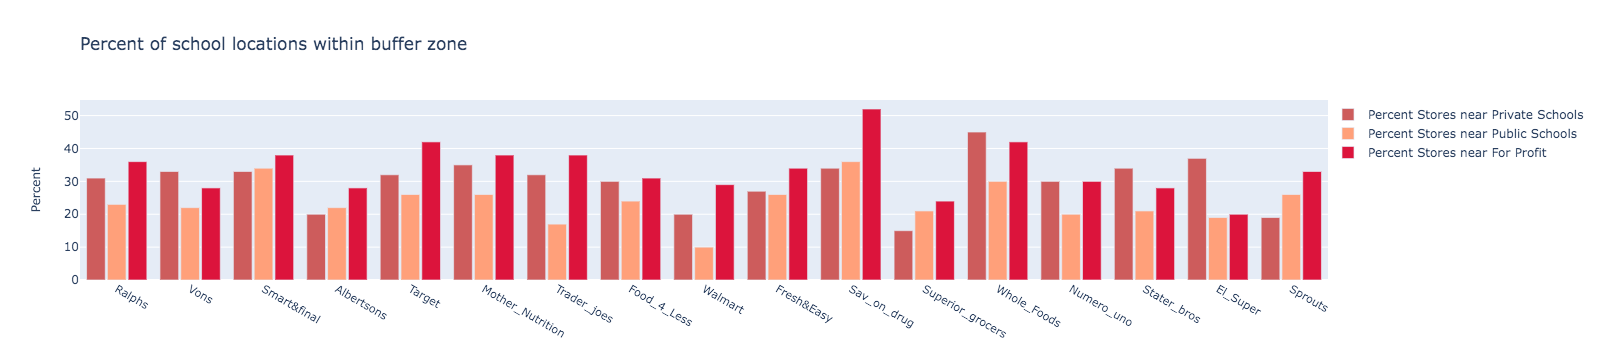

In [124]:
import plotly.graph_objects as go

Stores = ['Ralphs', 'Vons', 'Smart&final', 'Albertsons', 'Target', 'Mother_Nutrition',
          'Trader_joes', 'Food_4_Less', 'Walmart', 'Fresh&Easy', 'Sav_on_drug', 'Superior_grocers','Whole_Foods', 'Numero_uno', 'Stater_bros', 'El_Super', 'Sprouts', 'Vallarta']

fig = go.Figure()
fig.add_trace(go.Bar(
    x= Stores,
    y=[31, 33, 33, 20, 32, 35, 32, 30, 20, 27, 34, 15, 45, 30, 34, 37, 19],
    name='Percent Stores near Private Schools',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x= Stores,
    y=[23, 22, 34, 22, 26, 26, 17, 24, 10, 26, 36, 21, 30, 20, 21, 19, 26],
    name='Percent Stores near Public Schools',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x= Stores,
    y=[36, 28, 38, 28, 42, 38, 38, 31, 29, 34, 52, 24, 42, 30, 28, 20, 33],
    name='Percent Stores near For Profit',
    marker_color='crimson'
))

fig.update_layout(
    title='Percent of school locations within buffer zone',
    xaxis_tickfont_size=11,
    yaxis=dict(
        title='Percent',
        titlefont_size=12,
        tickfont_size=12,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [125]:
fig.write_html("percent_type_plotly.html")